In [51]:
!pip install nltk

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import numpy as np 
import pandas as pd 
import json
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 180

Autosaving every 180 seconds


In [13]:
registros = pd.read_csv('log_experimento.csv', sep=';')
registros.head()
c_usuarios = registros.loc[registros['log_type']=='login'].groupby(['FK_USUARIO_nickname']).mean()
#Cantidad de usuarios
c_usuarios.shape[0]


31

In [14]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


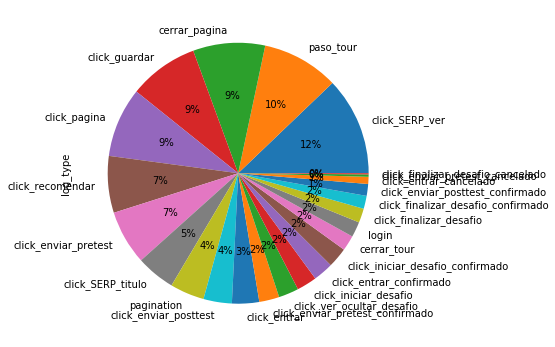

In [10]:
#cantidad de opciones
registros.log_type.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [15]:
#Acciones y veces 
registros.log_type.value_counts()

click_pagina                          649
click_recomendar                      485
click_SERP_ver                        422
click_guardar                         397
cerrar_pagina                         335
click_enviar_pretest                  319
click_enviar_posttest                 299
click_SERP_titulo                     286
pagination                            179
paso_tour                             137
click_entrar                          134
click_iniciar_desafio                 125
click_finalizar_desafio               124
click_entrar_confirmado               122
click_enviar_pretest_confirmado       122
click_iniciar_desafio_confirmado      122
click_finalizar_desafio_confirmado    121
click_enviar_posttest_confirmado      121
click_ver_ocultar_desafio              63
cerrar_tour                            31
login                                  31
click_entrar_cancelado                 12
click_salir                            10
click_enviar_pretest_cancelado    

In [16]:
#participantes del experimento
participantes = []
#acciones en el experimento
acciones = []

#obteniendo los identificadores de cada participante

registros.groupby(['FK_USUARIO_nickname']).mean()
for participante in registros.groupby(['FK_USUARIO_nickname']):
    if not participante[0] in participantes:
        participantes.append(participante[0])
        
for accion in registros.groupby(['log_type']):
    if not accion[0] in acciones:
        acciones.append(accion[0])
        
# Lista de participantes
display(participantes)
# Lista de acciones
display(acciones)

['usuario10',
 'usuario100',
 'usuario101',
 'usuario102',
 'usuario103',
 'usuario104',
 'usuario105',
 'usuario108',
 'usuario109',
 'usuario118',
 'usuario120',
 'usuario47',
 'usuario50',
 'usuario54',
 'usuario55',
 'usuario57',
 'usuario74',
 'usuario77',
 'usuario78',
 'usuario8',
 'usuario80',
 'usuario81',
 'usuario82',
 'usuario83',
 'usuario84',
 'usuario85',
 'usuario86',
 'usuario9',
 'usuario90',
 'usuario91',
 'usuario92']

['cerrar_pagina',
 'cerrar_tour',
 'click_SERP_titulo',
 'click_SERP_url',
 'click_SERP_ver',
 'click_entrar',
 'click_entrar_cancelado',
 'click_entrar_confirmado',
 'click_enviar_posttest',
 'click_enviar_posttest_cancelado',
 'click_enviar_posttest_confirmado',
 'click_enviar_pretest',
 'click_enviar_pretest_cancelado',
 'click_enviar_pretest_confirmado',
 'click_finalizar_desafio',
 'click_finalizar_desafio_cancelado',
 'click_finalizar_desafio_confirmado',
 'click_guardar',
 'click_iniciar_desafio',
 'click_iniciar_desafio_cancelado',
 'click_iniciar_desafio_confirmado',
 'click_pagina',
 'click_recomendar',
 'click_salir',
 'click_ver_ocultar_desafio',
 'login',
 'pagination',
 'paso_tour']

In [49]:
# definicion de cada participante como clase
class participante:
    
    def __init__(self, _id):
        self._id = _id
        self._pretest_num = [-1,-1,-1,-1]
        self._pretest_text = ['','','','']
        self._posttest_num = [-1,-1,-1,-1]
        self._posttest_text = ['','','','']
    
    def set_id(new_id):
        self._id = new_id
    
    def get_id(self):
        return self._id
    
    def set_pretest_num(self,position,new_data):
        self._pretest_num[position] = new_data
    
    def get_pretest_num(self):
        return self._pretest_num
    
    def set_pretest_text(self,position,new_data):
        self._pretest_text[position] = new_data
    
    def get_pretest_text(self):
        return self._pretest_text
    
    def set_posttest_num(self,position,new_data):
        self._posttest_num[position] = new_data
    
    def get_posttest_num(self):
        return self._posttest_num
    
    def set_posttest_text(self,position,new_data):
        self._posttest_text[position] = new_data
    
    def get_posttest_text(self):
        return self._posttest_text




[-1, 33333, -1, -1]

In [82]:

# obteniendo pretest
r_pretest = registros.loc[registros['log_type'] == 'click_enviar_pretest' ] 
for x in r_pretest['data']:
    print(x)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().